# Analyzing the Effect of Different Prize Structure on ohe Participation Rate: A Hypothesis Testing Approach

In a business setting, increasing the response rate of the target population is an essential task. Companies try various methods to encourage the participation of their employees in different fun activities to boost the sense of “unity.” In this study, I explored the effect of using two different prize structures on the response rate of the participants. The total amount of the prize for both scenarios was the same, except for one scenario, called “Before”, the number of winners was two, while for the other one, called “After” the number of winners was six. The number of participants for both before and after scenarios is comparable, 147 vs. 136, respectively. Throughout this analysis, I tried my best to keep the educational purpose of this Notebook, so there might be many concepts that you already know! With this background in mind, let’s start our analysis.

## Loading Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from scipy.stats import norm # we will use it to generate normal distributions of the boostrap replicates

%matplotlib inline

## Creating Data Arrays

We have two data arrays based on the design of our study. Given that the data points in both sample sets can take either True (representing a response) or False (representing no response), we can easily use the array function of the NumPy library to create our sample sets. For the Before scenario, we have received 34 responses, and interestingly, for the After scenario, we have received 33 responses. Let’s create these two arrays:

In [2]:
before = np.array([True] * 34 + [False] * 113)
after = np.array([True] * 33 + [False] * 103)

## Exploratory Data Analysis (EDA)

We are dealing with two small datasets, so the EDA is rather quite simple. I think a simple numerical analysis that shows the average response rate for both scenarios should suffice. Here it is:

In [3]:
print('The participation rate for the Before scenario is {0:0.1f}%'.format(np.mean(before)*100))
print('The participation rate for the After scenario is {0:0.1f}%'.format(np.mean(after)*100))

The participation rate for the Before scenario is 23.1%
The participation rate for the After scenario is 24.3%


OK, what we see is interesting! It seems that the change in prize structure has little to no effect on the participation rate. Well, intuitively we can say that it has no significant effect and we may not need any fancy analysis. However, in a business setting, you need to prove things with sound analysis. So, let’s keep moving…it helps us practice and have some fun with math!

## Hypothesis Testing

In hypothesis testing, we need to define a null hypothesis, which is always denoted by “no.” Like, there is no difference between the participation rates from the Before to the After scenario. This is how we define our hypothesis:
- Null hypothesis: There is no difference between the participation rates
- Alternative hypothesis: There is a difference between the participation rates


In hypothesis testing (and A/B testing), the sample size is determined through a rigorous process that takes into account various factors including statistical power and confidence level. However, in this study, we were limited in terms of the number of participants and sample size. So, what is the solution? Remember, we need to think probabilistically! The solution is "resampling." We employed the bootstrap technique, as a popular resampling technique in this study. In plain language, what this technique does is that it creates many replicates with the same size as your sample datasets by choosing randomly from the sample datasets. So, to implement the bootstrap technique, we need the replicate size. We use a large to offset the effect of noise when choosing a small replicate size. 
Here we write a function that implements this technique. This function takes three arguments:
- The original data, in the form of an array
- an aggregate function to calculate the desired metric – here, participation rate, for each replicate
- the number of replicates. 

The output of this function is an array with the calculated metric (participation rate) for each of the replicates. Let’s keep moving.

In [4]:
def bootstrap_func(data, func, draw_number):
    func_array = np.empty(draw_number) # creating an empty array
    for i in range(draw_number):
        bootstrap = np.random.choice(data, len(data)) # using numpy's choice method to create bootstrap replicates
        func_array[i] = func(bootstrap)
    return func_array    

We use this function to create 10,000 bootstrap replicates of both Before and After scenarios. One quick note is that we need to define a random seed to be able to replicate the results once again, without getting a different result every time we re-run the code. Let’s run the function and save our results in two arrays for Before and After scenarios. 

In [5]:
np.random.seed(42)

In [6]:
before_bs = bootstrap_func(before, np.mean, 100000)
after_bs = bootstrap_func(after, np.mean, 100000)

Now we are left with two new arrays, each including 10,000 members denoting the participation rate for each bootstrap replicate. We can create histograms of these replicates to get a better sense of their distribution. 

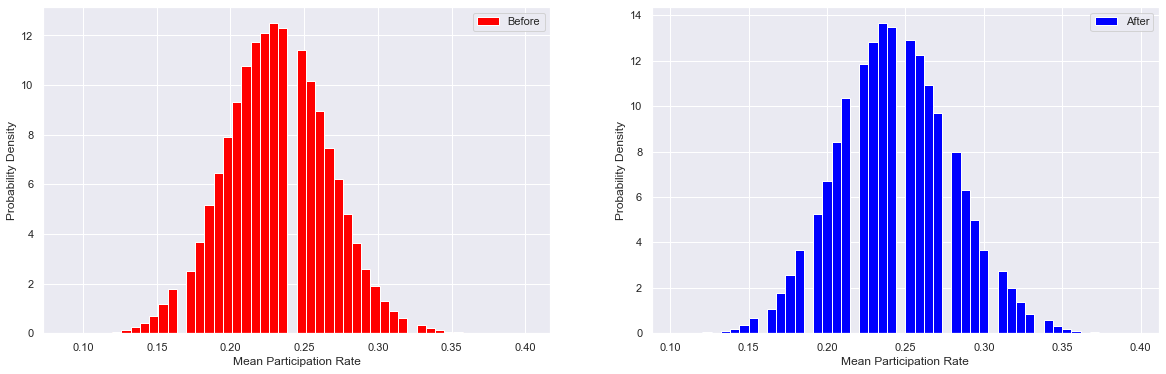

In [7]:
sns.set() # setting the visualization defaults to Seaborn defaults, I like those settings better!

labels = ['Before', 'After']

colors = ['Red', 'Blue']

data = [before_bs, after_bs]

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for i in range(len(data)):
    axs[i].hist(data[i], color=colors[i], label=labels[i], bins=50, density=True); # normalized so that the area under the graph is equal to 1
    axs[i].legend();
    axs[i].set_xlabel('Mean Participation Rate');
    axs[i].set_ylabel('Probability Density');

# plt.savefig('normal_dist.png', dpi=600) # uncomment if you want to save the figure
plt.show()

These are cool looking graphs, and of course, show normal distributions of the participation rates. So, how do we use these graphs? How do we conclude that there is a difference between participation rates from the Before to After scenarios from these graphs? How do we support these graphs numerically? 

To answer these questions, we need to bring up the concept of the 95% confidence interval (CI). In statistics, the 95% confidence interval simply means that there is a 95% probability that the identified interval includes the true mean. OK, good to know! How do we use these for our analysis? We need to bring up another relevant concept. In statistics, if we observe an overlap between the confidence intervals of two metrics (here, participation rate), then the difference between the two study groups is not statistically significant. 

Having these in mind, there are two methods we can use that both employ the abovementioned concepts. We will explore both methods in detail below.

For the first methods, we need to bring the two graphs into one x-y coordinate, show their 95% Cis With these in mind, let’s polish the graphs a little bit and rearrange the figures. We now want to put the two figures on top of each other on the same coordinate and then show their 95% intervals. If their 95% CI overlap, then we know the result. Here is the first method shows geographically:

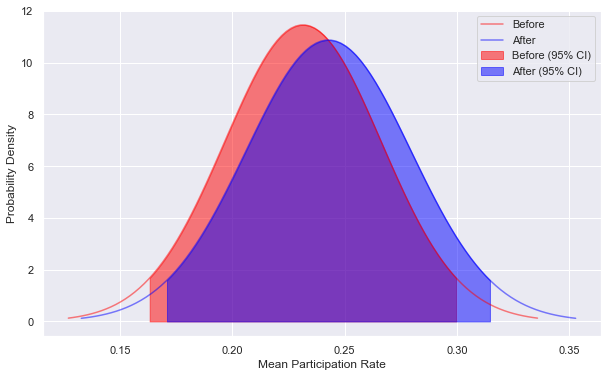

In [8]:
sns.set()

plt.figure(figsize=(10, 6))

before_mean = np.mean(before_bs)
before_std = np.std(before_bs)
before_line = np.linspace(before_mean - 3 * before_std, before_mean + 3 * before_std, 100) # we plot the before data within 3 standard deviation
before_95_fill = np.linspace(before_mean - 1.96 * before_std, before_mean + 1.96 * before_std, 100) # we know 95% CI falls within 1.96 standard deviation of the mean

plt.plot(before_line, norm.pdf(before_line, before_mean, before_std), alpha=0.5, color='Red', label='Before')
plt.fill_between(before_95_fill, norm.pdf(before_95_fill, before_mean, before_std), alpha=0.5, color='Red', label='Before (95% CI)')


after_mean = np.mean(after_bs)
after_std = np.std(after_bs)
after_line = np.linspace(after_mean - 3 * after_std, after_mean + 3 * after_std, 100) # we plot the after data within 3 standard deviation
after_95_line = np.linspace(after_mean - 1.96 * after_std, after_mean + 1.96 * after_std, 100) # we know 95% CI falls within 1.96 standard deviation of the mean

plt.plot(after_line, norm.pdf(after_line, after_mean, after_std), alpha=0.5, color='Blue', label='After')
plt.fill_between(after_95_line, norm.pdf(after_95_line, after_mean, after_std), alpha=0.5, color='Blue', label='After (95% CI)')

plt.xlabel('Mean Participation Rate');
plt.ylabel('Probability Density');
plt.legend();
plt.savefig('visual_1.png', dpi=600) # uncomment if you want to save the figure
plt.show()

OK, they overlap! So no statistically significant difference! 

The next method is an alternate version of the first method. In this method, we will subtract the Before mean replicates from the After mean replicates, then we draw the histogram (normal distribution) and its 95% CI. If the CI includes zero (which means the difference between participation rates between Before and After scenarios is zero) then there is no statistically significant difference between the means. Let’s explore it:

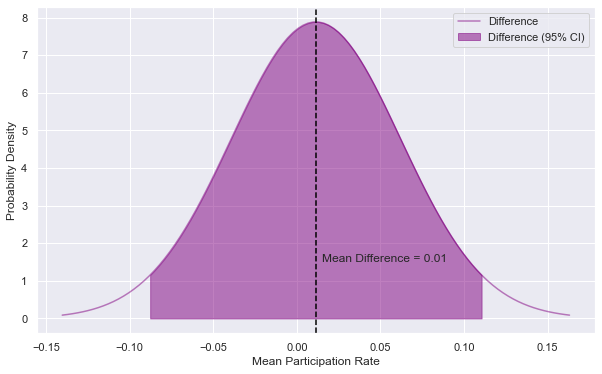

In [10]:
diff = after_bs - before_bs

plt.figure(figsize=(10, 6))

diff_mean = np.mean(diff)
diff_std = np.std(diff)
diff_line = np.linspace(diff_mean - 3 * diff_std, diff_mean + 3 * diff_std, 100)
diff_95_fill = np.linspace(diff_mean - 1.96 * diff_std, diff_mean + 1.96 * diff_std, 100)

plt.plot(diff_line, norm.pdf(diff_line, diff_mean, diff_std), alpha=0.5, color='Purple', label='Difference')
plt.fill_between(diff_95_fill, norm.pdf(diff_95_fill, diff_mean, diff_std), alpha=0.5, color='Purple', label='Difference (95% CI)')

plt.axvline(x=diff_mean, linestyle='--', color='Black')

plt.xlabel('Mean Participation Rate');
plt.ylabel('Probability Density');
plt.text(0.015, 1.5, 'Mean Difference = {0:0.2f}'.format(diff_mean));
plt.legend();
# plt.savefig('visual_2.png', dpi=600) # uncomment if you want to save the figure
plt.show()

The conclusion is the same as the 95% CI includes zero. We have also shown the mean difference, which is very close to zero!

We can also prove our conclusions numerically using the p-value. We can calculate the p-value as the number of the data points in the mean difference array taking values at least as large as zero to the total number of observations. Let’s do so:

In [11]:
p_value = np.sum(diff >= 0) / len(diff)
print('The calculated p-value is {0:0.2f}'.format(p_value))

The calculated p-value is 0.59


In hypothesis testing, is the p-values is greater than 0.90 (you might use a different number, like 0.95, or even 0.99 depending on the problem you want to solve) it means that we cannot reject the null hypothesis and, here, there is no difference in the participation rates between two scenarios. The calculated p-value is 0.59, and you know the conclusion! 

## Conclusions

In this study, we analyzed the effect of two different prize structures on the participation rate in an activity. The nature of the problem governs the use of hypothesis testing. Given the sample size limitation, we used the bootstrap method, a resampling technique, to increase the sample size. We employed two different visual methods as well as p-value calculation to determine the difference between the participation rates given the type of prize structure. All analyses identified no statistically significant difference between the participation rates, hence the change in prize structure does not affect the participation rate. 